## ***introduction***

This analysis aims to explore the relationships between **food waste**, **food insecurity**, **population density** and **economy**.<br>
Because a worthwhile historical approach to this topic would require far more knowledge, nuance, time, and resources that I currently posess, the scope of this analysis will be limited to the year 2020.<br>
Therefore, all data herein is assumed to be taken from the year 2020.

## ***importing necessary libraries***

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

## ***datasets used***
- Food waste by country (.CSV from Kaggle): https://www.kaggle.com/datasets/joebeachcapital/food-waste/data

- GDP per capita (wealth) by country (.CSV from Data.WorldBank.Org): https://data.worldbank.org/indicator/NY.GDP.PCAP.CD

- Population density by country (.CSV from Data.WorldBank.Org): https://data.worldbank.org/indicator/EN.POP.DNST

- Prevalence of moderate-to-severe food insecurity in the population by country (.CSV from Data.WorldBank.Org): https://data.worldbank.org/indicator/SN.ITK.MSFI.ZS?view=chart<br><br>

These files are located in the "**data**" folder nested in the main *food-waste-analysis* directory.

## ***using the OS module to locate the data***

In [2]:
# get the current working directory
script_dir = os.getcwd()

# define the relative paths to the CSV files within the "data" folder
food_waste_relative_path = os.path.join("data", "food_waste_by_country.csv")
wealth_relative_path = os.path.join("data", "gdp_per_capita_current_prices.csv")
pop_density_relative_path = os.path.join("data", "pop_density_by_country.csv")
food_insecurity_relative_path = os.path.join("data", "food_insecurity_by_country.csv")

# construct the absolute paths
food_waste_file = os.path.join(script_dir, food_waste_relative_path)
wealth_file = os.path.join(script_dir, wealth_relative_path)
pop_density_file = os.path.join(script_dir, pop_density_relative_path)
food_insecurity_file = os.path.join(script_dir, food_insecurity_relative_path)

## ***loading the data***

In [3]:
# read the FOOD WASTE .csv file into a dataframe
food_waste_df = pd.read_csv(food_waste_file)

# read the GDP PER CAPITA .csv file into a dataframe
wealth_df = pd.read_csv(wealth_file)

# read the POPULATION DENSITY .csv file into a dataframe
pop_density_df = pd.read_csv(pop_density_file)

# read the FOOD INSECURITY .csv file into a dataframe
food_insecurity_df = pd.read_csv(food_insecurity_file)

## ***cleaning the data***

In this section, we will examine and evaluate each dataset individually to identify the data we want to keep from each.

##### **dataframe #1: food waste**

In [4]:
# print the first 5 rows of the FOOD WASTE dataframe for examination
print(food_waste_df.head())

       Country  combined figures (kg/capita/year)  \
0  Afghanistan                                126   
1      Albania                                127   
2      Algeria                                135   
3      Andorra                                123   
4       Angola                                144   

   Household estimate (kg/capita/year)  Household estimate (tonnes/year)  \
0                                   82                           3109153   
1                                   83                            238492   
2                                   91                           3918529   
3                                   84                              6497   
4                                  100                           3169523   

   Retail estimate (kg/capita/year)  Retail estimate (tonnes/year)  \
0                                16                         594982   
1                                16                          45058   
2             

In [5]:
# print all column names from the FOOD WASTE data to identify any columns that are irrelevant to our analysis
print(food_waste_df.columns)

Index(['Country', 'combined figures (kg/capita/year)',
       'Household estimate (kg/capita/year)',
       'Household estimate (tonnes/year)', 'Retail estimate (kg/capita/year)',
       'Retail estimate (tonnes/year)',
       'Food service estimate (kg/capita/year)',
       'Food service estimate (tonnes/year)', 'Confidence in estimate',
       'M49 code', 'Region', 'Source'],
      dtype='object')


In [6]:
# define list of column names to drop from FOOD WASTE dataframe
food_waste_cols_to_drop = ['Household estimate (kg/capita/year)',
       'Household estimate (tonnes/year)', 'Retail estimate (kg/capita/year)',
       'Retail estimate (tonnes/year)',
       'Food service estimate (kg/capita/year)',
       'Food service estimate (tonnes/year)', 'Confidence in estimate',
       'M49 code', 'Source']

# drop the columns from the FOOD WASTE dataframe
food_waste_df = food_waste_df.drop(columns=food_waste_cols_to_drop)

# rename the remaining columns
food_waste_df.columns = ["country", "food_wasted", "region"]

# print first few rows to verify columns were dropped & renamed
print(food_waste_df.head())

       country  food_wasted              region
0  Afghanistan          126       Southern Asia
1      Albania          127     Southern Europe
2      Algeria          135     Northern Africa
3      Andorra          123     Southern Europe
4       Angola          144  Sub-Saharan Africa


##### **dataframe #2: GDP per capita (wealth)**

In [7]:
# print the first 5 rows of the WEALTH dataframe for examination
print(wealth_df.head())

  GDP per capita, current prices\n (U.S. dollars per capita)      1980  \
0                                                NaN               NaN   
1                                        Afghanistan           no data   
2                                            Albania           728.359   
3                                            Algeria          2268.607   
4                                            Andorra           no data   

       1981      1982      1983      1984      1985      1986      1987  \
0       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1   no data   no data   no data   no data   no data   no data   no data   
2   817.734   824.542   815.529   788.332   788.801   855.724   832.245   
3  2305.505  2254.328  2316.679  2432.717  2753.697  2698.915  2705.111   
4   no data   no data   no data   no data   no data   no data   no data   

       1988  ...       2019       2020       2021       2022       2023  \
0       NaN  ...        NaN  

In [8]:
# drop the first row, which contains no data
wealth_df = wealth_df.drop(0, axis=0)

# print all column names from the WEALTH data to identify any columns that are irrelevant to our analysis
print(wealth_df.columns)

Index(['GDP per capita, current prices\n (U.S. dollars per capita)', '1980',
       '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989',
       '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998',
       '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024', '2025',
       '2026', '2027', '2028'],
      dtype='object')


In [9]:
# define list of column names to drop from WEALTH dataframe
wealth_cols_to_drop = ['1980',
       '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989',
       '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998',
       '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '2019', '2021', '2022', '2023', '2024', '2025',
       '2026', '2027', '2028']

# drop the columns from the WEALTH dataframe
wealth_df = wealth_df.drop(columns=wealth_cols_to_drop)

# rename the remaining columns
wealth_df.columns = ["country", "wealth"]

# print first few rows to verify columns were dropped & renamed
print(wealth_df.head())

       country     wealth
1  Afghanistan    611.268
2      Albania   5278.986
3      Algeria   3321.601
4      Andorra  36973.845
5       Angola   1709.283


##### **dataframe #3: population density**

In [10]:
# print the first 5 rows of the POPULATION DENSITY dataframe for examination
print(pop_density_df.head())

                                         Series Name  Series Code  \
0  Population density (people per sq. km of land ...  EN.POP.DNST   
1  Population density (people per sq. km of land ...  EN.POP.DNST   
2  Population density (people per sq. km of land ...  EN.POP.DNST   
3  Population density (people per sq. km of land ...  EN.POP.DNST   
4  Population density (people per sq. km of land ...  EN.POP.DNST   

  Country Name Country Code 1990 [YR1990] 2000 [YR2000] 2013 [YR2013]  \
0  Afghanistan          AFG   16.39727703   29.96332889   48.35902826   
1      Albania          ALB   119.9467883   112.7382117    105.660292   
2      Algeria          DZA   10.71404687   12.92106653   15.95498501   
3      Andorra          AND   113.9765957   140.6319149   151.8446809   
4       Angola          AGO   9.487958611   13.14996551   20.97297024   

  2014 [YR2014] 2015 [YR2015] 2016 [YR2016] 2017 [YR2017] 2018 [YR2018]  \
0   50.16054153   51.75091455   53.10428376   54.64854116   56.24823145

In [11]:
# print all column names from the POPULATION DENSITY data to identify any columns that are irrelevant to our analysis
print(pop_density_df.columns)

Index(['Series Name', 'Series Code', 'Country Name', 'Country Code',
       '1990 [YR1990]', '2000 [YR2000]', '2013 [YR2013]', '2014 [YR2014]',
       '2015 [YR2015]', '2016 [YR2016]', '2017 [YR2017]', '2018 [YR2018]',
       '2019 [YR2019]', '2020 [YR2020]', '2021 [YR2021]', '2022 [YR2022]'],
      dtype='object')


In [12]:
# define list of column names to drop from POPULATION DENSITY dataframe
pop_density_cols_to_drop = ['Series Name', 'Series Code', 'Country Code',
       '1990 [YR1990]', '2000 [YR2000]', '2013 [YR2013]', '2014 [YR2014]',
       '2015 [YR2015]', '2016 [YR2016]', '2017 [YR2017]', '2018 [YR2018]',
       '2019 [YR2019]', '2021 [YR2021]', '2022 [YR2022]']

# drop the columns from the POPULATION DENSITY dataframe
pop_density_df = pop_density_df.drop(columns=pop_density_cols_to_drop)

# rename the remaining columns
pop_density_df.columns = ["country", "pop_density"]

# print first few rows to verify columns were dropped & renamed
print(pop_density_df.head())

       country  pop_density
0  Afghanistan  59.75228064
1      Albania  103.5711314
2      Algeria  18.24365706
3      Andorra  165.3191489
4       Angola  26.81357664


##### **dataframe #4: presence of moderate-to-severe food insecurity**

In [13]:
# print the first 5 rows of the FOOD INSECURITY dataframe for examination
print(food_insecurity_df.head())

                                         Series Name     Series Code  \
0  Prevalence of moderate or severe food insecuri...  SN.ITK.MSFI.ZS   
1  Prevalence of moderate or severe food insecuri...  SN.ITK.MSFI.ZS   
2  Prevalence of moderate or severe food insecuri...  SN.ITK.MSFI.ZS   
3  Prevalence of moderate or severe food insecuri...  SN.ITK.MSFI.ZS   
4  Prevalence of moderate or severe food insecuri...  SN.ITK.MSFI.ZS   

  Country Name Country Code 1990 [YR1990] 2000 [YR2000] 2013 [YR2013]  \
0  Afghanistan          AFG            ..            ..            ..   
1      Albania          ALB            ..            ..            ..   
2      Algeria          DZA            ..            ..            ..   
3      Andorra          AND            ..            ..            ..   
4       Angola          AGO            ..            ..            ..   

  2014 [YR2014] 2015 [YR2015] 2016 [YR2016] 2017 [YR2017] 2018 [YR2018]  \
0            ..          45.1          49.6          

In [14]:
# print all column names from the FOOD INSECURITY data to identify any columns that are irrelevant to our analysis
print(food_insecurity_df.columns)

Index(['Series Name', 'Series Code', 'Country Name', 'Country Code',
       '1990 [YR1990]', '2000 [YR2000]', '2013 [YR2013]', '2014 [YR2014]',
       '2015 [YR2015]', '2016 [YR2016]', '2017 [YR2017]', '2018 [YR2018]',
       '2019 [YR2019]', '2020 [YR2020]', '2021 [YR2021]', '2022 [YR2022]'],
      dtype='object')


In [15]:
# define list of column names to drop from FOOD INSECURITY dataframe
food_insecurity_cols_to_drop = ['Series Name', 'Series Code', 'Country Code',
       '1990 [YR1990]', '2000 [YR2000]', '2013 [YR2013]', '2014 [YR2014]',
       '2015 [YR2015]', '2016 [YR2016]', '2017 [YR2017]', '2018 [YR2018]',
       '2019 [YR2019]', '2021 [YR2021]', '2022 [YR2022]']

# drop the columns from the FOOD INSECURITY dataframe
food_insecurity_df = food_insecurity_df.drop(columns=food_insecurity_cols_to_drop)

# rename the remaining columns
food_insecurity_df.columns = ["country", "food_insecurity"]

# print first few rows to verify columns were dropped & renamed
print(food_insecurity_df.head())

       country food_insecurity
0  Afghanistan            70.1
1      Albania            30.9
2      Algeria              19
3      Andorra              ..
4       Angola            77.7


## ***merging the data***

In [16]:
# merge the dataframes on the COUNTRY column
waste_analysis = pd.merge(food_waste_df, wealth_df, on="country", how="left")
waste_analysis = pd.merge(waste_analysis, pop_density_df, on="country", how="left")
waste_analysis = pd.merge(waste_analysis, food_insecurity_df, on="country", how="left")

# convert to numeric, set non-numeric values to NaN
waste_analysis['wealth'] = pd.to_numeric(waste_analysis['wealth'], errors='coerce')
waste_analysis['food_wasted'] = pd.to_numeric(waste_analysis['food_wasted'], errors='coerce')
waste_analysis['pop_density'] = pd.to_numeric(waste_analysis['pop_density'], errors='coerce')
waste_analysis['food_insecurity'] = pd.to_numeric(waste_analysis['food_insecurity'], errors='coerce')

# reorder the columns in the overall WASTE ANALYSIS dataframe
waste_analysis = waste_analysis[['country', 'food_wasted', 'wealth', 'pop_density', 'food_insecurity', 'region']]

# print the first 5 rows of the overall WASTE ANALYSIS dataframe to verify successful merge & reordering of columns
print(waste_analysis.head())

       country  food_wasted     wealth  pop_density  food_insecurity  \
0  Afghanistan          126    611.268    59.752281             70.1   
1      Albania          127   5278.986   103.571131             30.9   
2      Algeria          135   3321.601    18.243657             19.0   
3      Andorra          123  36973.845   165.319149              NaN   
4       Angola          144   1709.283    26.813577             77.7   

               region  
0       Southern Asia  
1     Southern Europe  
2     Northern Africa  
3     Southern Europe  
4  Sub-Saharan Africa  


## ***calculating new values***

### *ranking by food waste*

Ranks provide us with benchmarks that allow us to compare countries in a relative sense.<br>
For example, we can easily see which countries are in the top 5 or bottom 5 in terms of food waste, and put that into context with the other variables we are examining.

In [17]:
# create a new column called "food_waste_rank" wherein countries are assigned a rank based on their position in the list when sorted in descending order by FOOD WASTE
waste_analysis['food_waste_rank'] = waste_analysis['food_wasted'].rank(ascending=False, method='min').astype(int)

# display the DataFrame sorted by 'food_waste_rank', dropping the index for a cleaner display
print(waste_analysis[['country', 'food_wasted', 'food_waste_rank']].sort_values(by='food_waste_rank').reset_index(drop=True))

                country  food_wasted  food_waste_rank
0              Malaysia          260                1
1               Nigeria          233                2
2                Rwanda          208                3
3                Israel          178                4
4                Greece          175                5
..                  ...          ...              ...
205          Bangladesh           84              205
206             Belgium           80              207
207             Austria           76              208
208  Russian Federation           75              209
209            Slovenia           61              210

[210 rows x 3 columns]


### *regional averages*
Here we are compiling regional averages for food waste, wealth, population density, and food insecurity.<br>
This could help us better highlight certain trends later on.

In [18]:
# calculate regional averages
avg_region_data = waste_analysis.groupby('region').agg({'food_wasted': 'mean', 'wealth': 'mean', 'food_insecurity': 'mean', 'pop_density': 'mean'})
print(avg_region_data)

                                 food_wasted        wealth  food_insecurity  \
region                                                                        
Australia and New Zealand         111.500000  47200.850500        13.200000   
Central Asia                      130.200000   4349.037400        11.000000   
Eastern Asia                      113.000000  28344.703667         5.100000   
Eastern Europe                    109.400000  12245.668700        12.611111   
Latin America and the Caribbean   115.675000   9733.111182        35.972727   
Melanesia                         128.600000   3305.015000        21.300000   
Micronesia                        123.142857   7165.195400        41.000000   
Northern Africa                   133.500000   3652.188000        32.880000   
Northern America                  123.333333  53480.527000         7.250000   
Northern Europe                   111.666667  47843.576700         6.730000   
Polynesia                         119.500000   4695.

### *waste_to_wealth ratio*

Next we can calculate a ratio that represents the rate at which a country turns its economic output into food waste.<br>
This could serve as a health indicator for the status of a country's food supply chain and/or the effectiveness of food waste reduction efforts.

In [19]:
# create a new column called 'waste_to_wealth_ratio', calculated by dividing 'food_wasted' by 'wealth'
waste_analysis['waste_to_wealth_ratio'] = waste_analysis['food_wasted'] / waste_analysis['wealth']

# reorder & print the first 5 rows of the updated WASTE ANALYSIS dataframe
waste_analysis = waste_analysis[['food_waste_rank', 'country', 'food_wasted', 'wealth', 'waste_to_wealth_ratio', 'food_insecurity', 'pop_density', 'region']]
print(waste_analysis.head())

# add the waste_to_wealth_ratio to the average region data
avg_region_data = waste_analysis.groupby('region').agg({'food_wasted': 'mean', 'wealth': 'mean', 'food_insecurity': 'mean', 'pop_density': 'mean', 'waste_to_wealth_ratio': 'mean'})

   food_waste_rank      country  food_wasted     wealth  \
0               96  Afghanistan          126    611.268   
1               91      Albania          127   5278.986   
2               63      Algeria          135   3321.601   
3              105      Andorra          123  36973.845   
4               35       Angola          144   1709.283   

   waste_to_wealth_ratio  food_insecurity  pop_density              region  
0               0.206129             70.1    59.752281       Southern Asia  
1               0.024058             30.9   103.571131     Southern Europe  
2               0.040643             19.0    18.243657     Northern Africa  
3               0.003327              NaN   165.319149     Southern Europe  
4               0.084246             77.7    26.813577  Sub-Saharan Africa  


### *correlation analysis*
By calculating the correlation coefficients between our different variables, we can identify potential relationships/dependencies or lack thereof between them.

In [20]:
# select relevant columns for correlation analysis
correlation_data = waste_analysis[['food_wasted', 'wealth', 'pop_density', 'food_insecurity']]

# calculate correlation matrix, rounded to the nearest thousandth for tidier output
correlation_matrix = correlation_data.corr().round(3)

# display the correlation matrix 
print(correlation_matrix)

                 food_wasted  wealth  pop_density  food_insecurity
food_wasted            1.000  -0.283       -0.085            0.432
wealth                -0.283   1.000        0.192           -0.587
pop_density           -0.085   0.192        1.000           -0.129
food_insecurity        0.432  -0.587       -0.129            1.000


## ***visualizing the data***

### *regional averages*

In this section, we will visualize the regional averages we previously calculated.

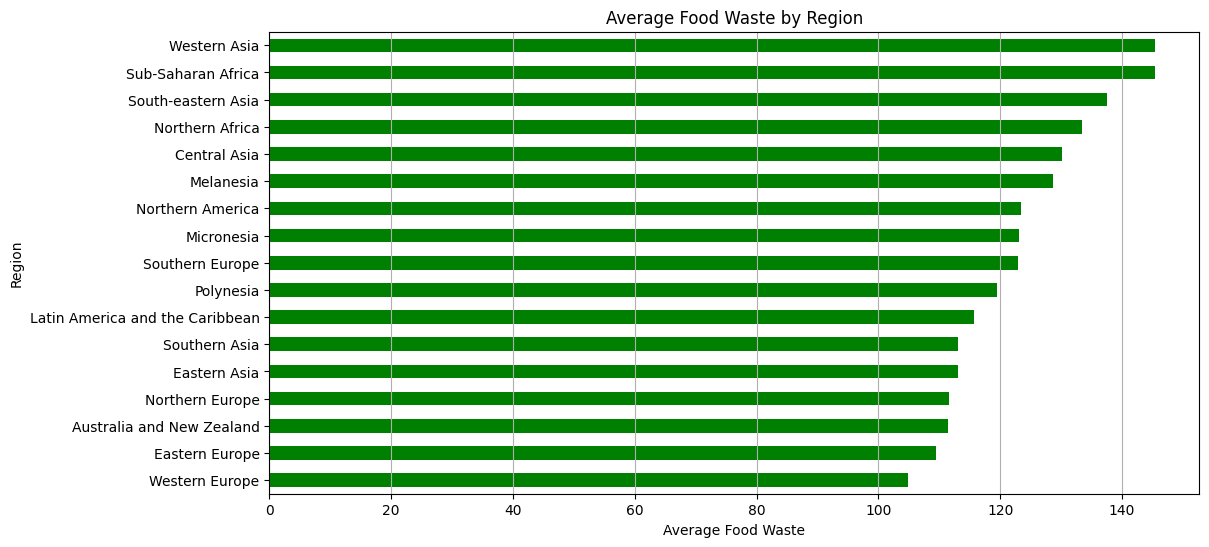

In [21]:
plt.figure(figsize=(12, 6))
avg_region_data['food_wasted'].sort_values().plot(kind='barh', color='green')
plt.title('Average Food Waste by Region')
plt.xlabel('Average Food Waste')
plt.ylabel('Region')
plt.grid(axis='x')
plt.show()

*Interpretation*:<br>
**Countries in Western Asia have the most food waste**, generating on average over 140kg of food waste per capita.<br>
**Western European nations create the least food waste** on average, which is still a significant amount at over 100kg per capita.

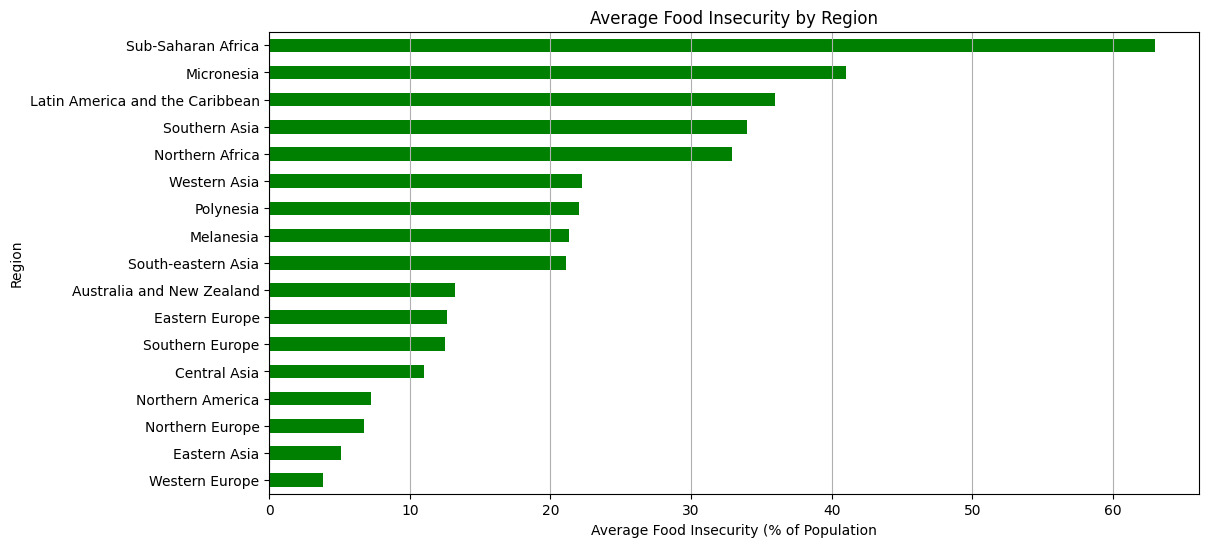

In [22]:
plt.figure(figsize=(12, 6))
avg_region_data['food_insecurity'].sort_values().plot(kind='barh', color='green')
plt.title('Average Food Insecurity by Region')
plt.xlabel('Average Food Insecurity (% of Population')
plt.ylabel('Region')
plt.grid(axis='x')
plt.show()

*Interpretation*:<br>
**Sub-Saharan African countries are the least food-secure**, with over 60% of the population experiencing moderate-to-severe food insecurity.<br>
**Western European nations are the most food-secure** on average, with less than 5% of the population experiencing moderate-to-severe food insecurity.

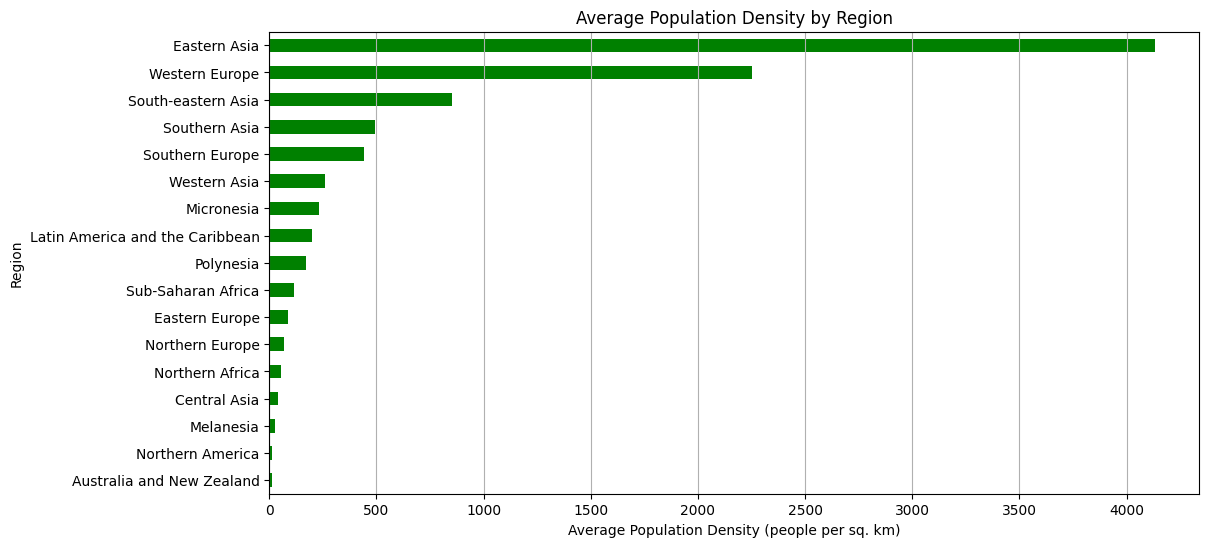

In [23]:
plt.figure(figsize=(12, 6))
avg_region_data['pop_density'].sort_values().plot(kind='barh', color='green')
plt.title('Average Population Density by Region')
plt.xlabel('Average Population Density (people per sq. km)')
plt.ylabel('Region')
plt.grid(axis='x')
plt.show()

*Interpretation*:<br>
**Countries in Eastern Asia are the most population-dense**, with over 4000 people per square kilometer on average.<br>
**Australia and New Zealand are the least densely populated countries** with fewer than 25 people per square kilometer on average.

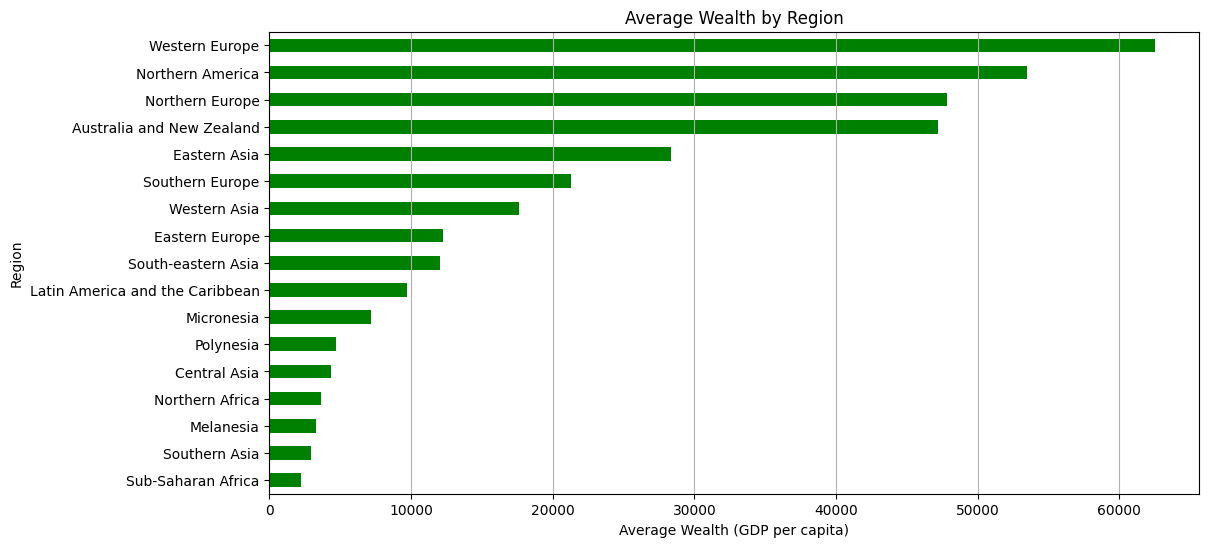

In [24]:
plt.figure(figsize=(12, 6))
avg_region_data['wealth'].sort_values().plot(kind='barh', color='green')
plt.title('Average Wealth by Region')
plt.xlabel('Average Wealth (GDP per capita)')
plt.ylabel('Region')
plt.grid(axis='x')
plt.show()

*Interpretation*:<br>
**Western European countries are by far the wealthiest**, while **Sub-Saharan African countries are vastly poorer**.

In addition, we can also have a look at how wealth is distributed at the regional level.<br>
This can shed light on disparities in economic development among countries within each region.<br>
Understanding regional wealth distribution is crucial for comprehending how economic factors influence patterns of food consumption, waste generation, and addressing food security challenges.<br>

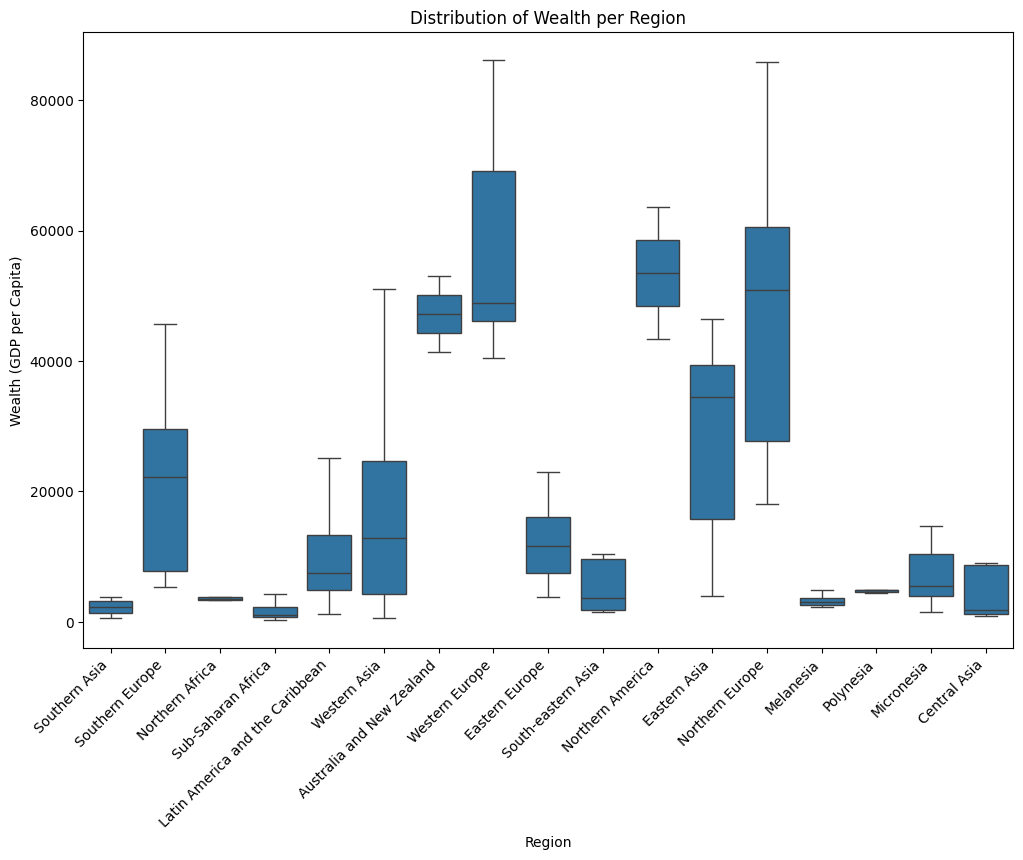

In [25]:
# create a box plot excluding outliers
plt.figure(figsize=(12, 8))
sns.boxplot(x='region', y='wealth', data=waste_analysis, showfliers=False)
plt.title('Distribution of Wealth per Region')
plt.xlabel('Region')
plt.ylabel('Wealth (GDP per Capita)')

# Abbreviate x-axis labels
plt.xticks(rotation=45, ha="right")

plt.show()

It is worth nothing that **the wealthiest countries also have the greatest economic spread.**

### *correlation analysis*

In this section, we will visualize the correlation matrix we previously created and explore some of the values it generated.

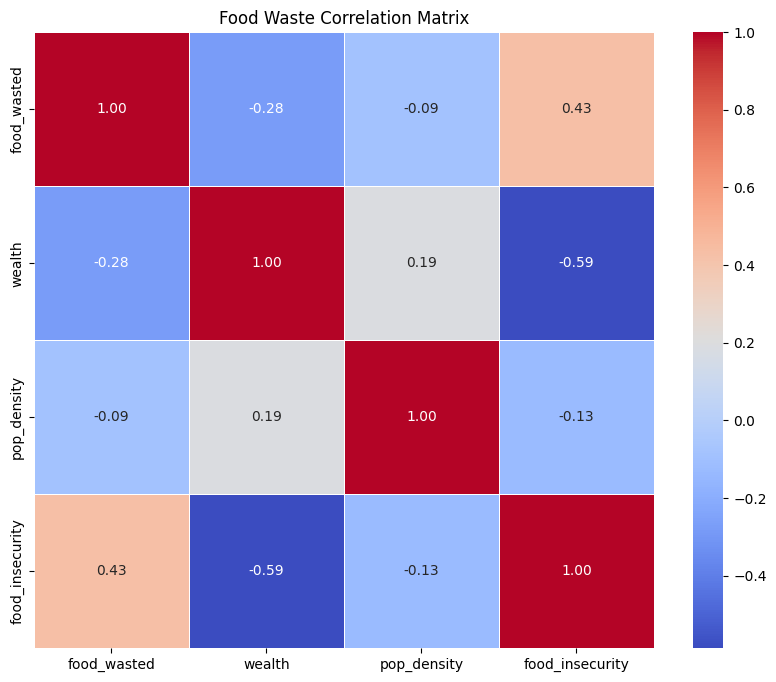

In [26]:
# visualize the correlation matrix with a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Food Waste Correlation Matrix')
plt.show()

***Food waste vs. Wealth***

Correlation coefficient: -0.283366<br><br>
*Interpretation*:<br>
There is a negative correlation of approximately -0.28 between the amount of food wasted and the wealth (GDP per capita) of a country.<br>
This suggests that, on average, as the wealth of a country increases, the amount of food wasted per capita tends to decrease.<br>
Let's attempt to visualize that trend while also utilizing the *waste_to_wealth_ratio* we previously calculated for each country in the dataset.

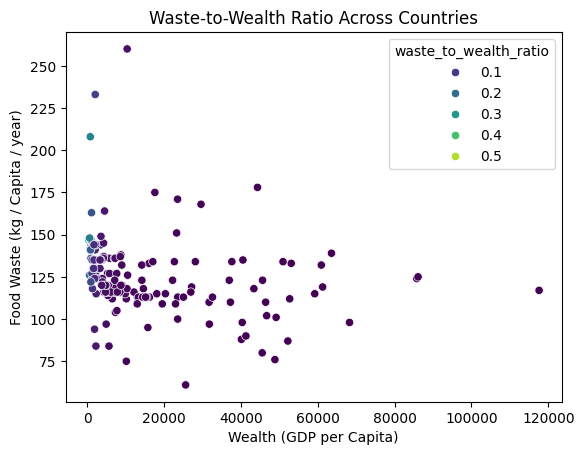

In [27]:
# visualize food_waste against wealth in addition to the 'waste_to_wealth_ratio' using a scatter plot
sns.scatterplot(x='wealth', y='food_wasted', hue='waste_to_wealth_ratio', data=waste_analysis, palette='viridis')
plt.xlabel('Wealth (GDP per Capita)')
plt.ylabel('Food Waste (kg / Capita / year)')
plt.title('Waste-to-Wealth Ratio Across Countries')
plt.show()

This is good, but the outliers are causing the graph to squish the points to a point where it's a bit difficult to see what's going on.<br>
Let's refine this view further so we can get a clearer picture.

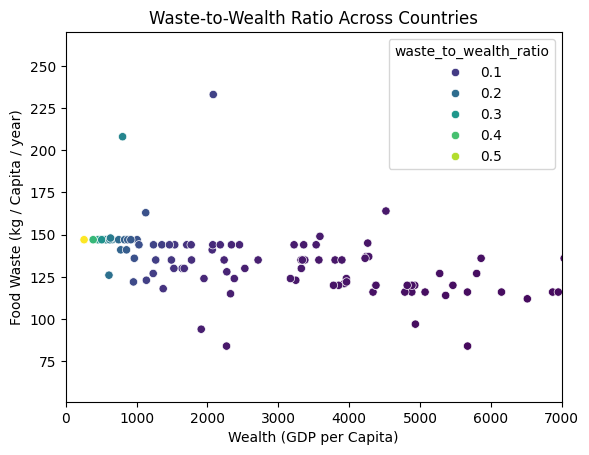

In [28]:
# visualize food_waste against wealth in addition to the 'waste_to_wealth_ratio' using a scatter plot
sns.scatterplot(x='wealth', y='food_wasted', hue='waste_to_wealth_ratio', data=waste_analysis, palette='viridis')
plt.xlabel('Wealth (GDP per Capita)')
plt.ylabel('Food Waste (kg / Capita / year)')
plt.title('Waste-to-Wealth Ratio Across Countries')

# set x-axis threshold to exclude outliers
plt.xlim(left=0, right=7000)

plt.show()

A higher *waste_to_wealth_ratio* suggests that the country is generating a relatively large amount of food waste compared to its economic output.<br>
This may indicate inefficiencies in the food supply chain, excessive consumption, or wasteful practices.

A lower *waste_to_wealth_ratio* suggests that the country is more efficient in managing its food resources, as it generates less food waste relative to its economic output.<br>
This could be a sign of more effective food distribution, consumption practices, and waste reduction efforts.

While there appears to be somewhat of a link between a country's wealth and the amount of food it wastes, that connection is not very strong.<br>
It is worth noting, however, that countries with the lowest *waste_to_wealth_ratio*s were all among the most wealthy.

***Food waste vs. Food insecurity***

Correlation coefficient: 0.432286<br>

*Interpretation*:<br>
There is a positive correlation of approximately 0.43 between the amount of food wasted and the prevalence of food insecurity in a country.<br>
This suggests that, on average, as the level of food insecurity increases, the amount of food wasted increases as well.<br>

Let's attempt to visualize that trend by plotting *food_waste* vs. *food_insecurity* for all countries in the dataset.<br>
From this view, it is clear that almost all countries waste between 75 and 150kg/capita of food/year, and that there does appear to be a positive correlation between waste and insecurity overall.


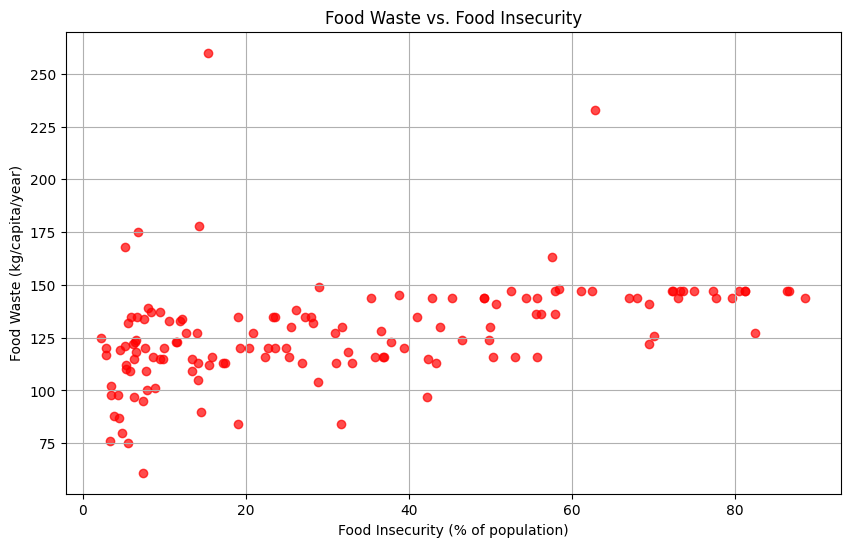

In [29]:
# visualize food_waste against food_insecurity using a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(waste_analysis['food_insecurity'], waste_analysis['food_wasted'], color='red', alpha=0.7)
plt.title('Food Waste vs. Food Insecurity')
plt.xlabel('Food Insecurity (% of population)')
plt.ylabel('Food Waste (kg/capita/year)')
plt.grid(True)
plt.show()

Utlizing the *food_waste_rank* we assigned to each country earlier, we can refine this plot to show only the top and bottom 25 ranked countries to explore that correlation further.<br>
This visualization clearly supports the notion that, on average, as food insecurity increases, food waste also increases.

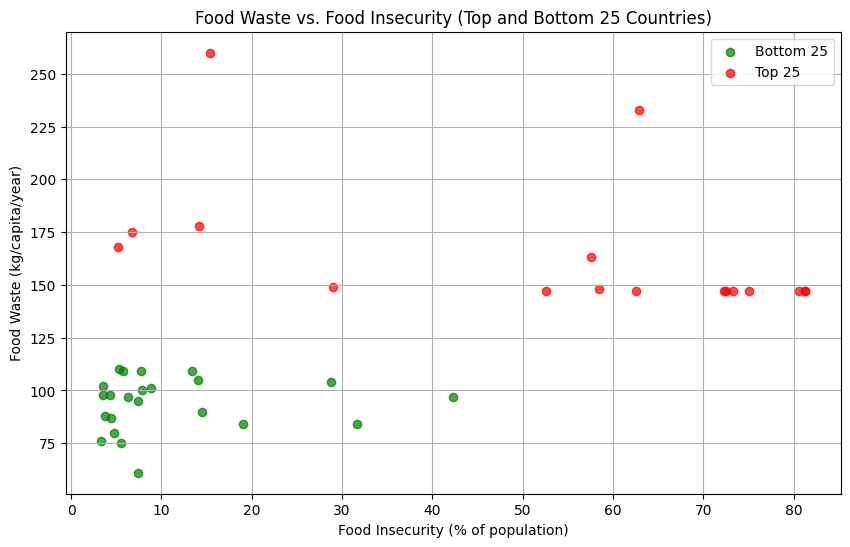

In [30]:
# sort the WASTE ANALYSIS dataframe by 'food_waste_rank'
waste_analysis.sort_values(by='food_waste_rank', inplace=True)

# select the top and bottom 25 countries
top_25 = waste_analysis.head(25)
bottom_25 = waste_analysis.tail(25)

# visualize food_waste against food_insecurity using a scatter plot, with different colors for top and bottom 25 countries to better showcase trends 
plt.figure(figsize=(10, 6))
plt.scatter(bottom_25['food_insecurity'], bottom_25['food_wasted'], color='green', alpha=0.7, label='Bottom 25')
plt.scatter(top_25['food_insecurity'], top_25['food_wasted'], color='red', alpha=0.7, label='Top 25')
plt.title('Food Waste vs. Food Insecurity (Top and Bottom 25 Countries)')
plt.xlabel('Food Insecurity (% of population)')
plt.ylabel('Food Waste (kg/capita/year)')
plt.legend()
plt.grid(True)
plt.show()

***Wealth vs. Food insecurity***

Correlation coefficient: -0.586695<br>

*Interpretation*:<br>
There is a strong negative correlation of approximately -0.59 between the wealth (GDP per capita) of a country and the prevalence of food insecurity.<br>
This suggests that, on average, as the wealth of a country increases, the level of food insecurity tends to decrease, which we would reasonably expect.


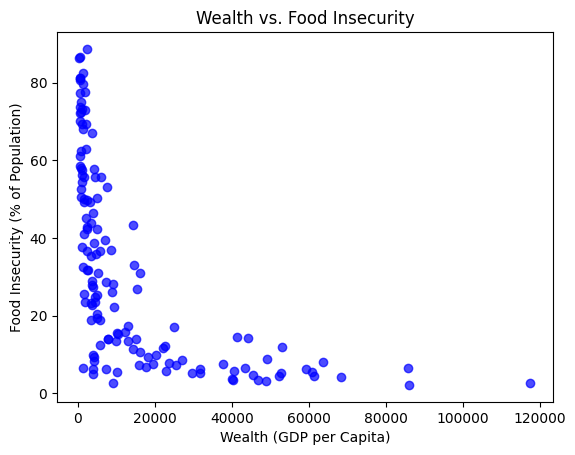

In [31]:
# visualize wealth against food_insecurity using a scatter plot
plt.scatter(
    waste_analysis['wealth'],
    waste_analysis['food_insecurity'],
    c='blue',  # You can customize the color
    alpha=0.7
)
plt.xlabel('Wealth (GDP per Capita)')
plt.ylabel('Food Insecurity (% of Population)')
plt.title('Wealth vs. Food Insecurity')
plt.show()

***Population density vs. Food insecurity***

Correlation coefficient: -0.129031<br>

*Interpretation*:<br>
There is a weak negative correlation of approximately -0.13 between population density and the prevalence of food insecurity.<br>
This suggests a slight tendency for countries with higher population density to have slightly lower levels of food insecurity, although the correlation is not very strong.

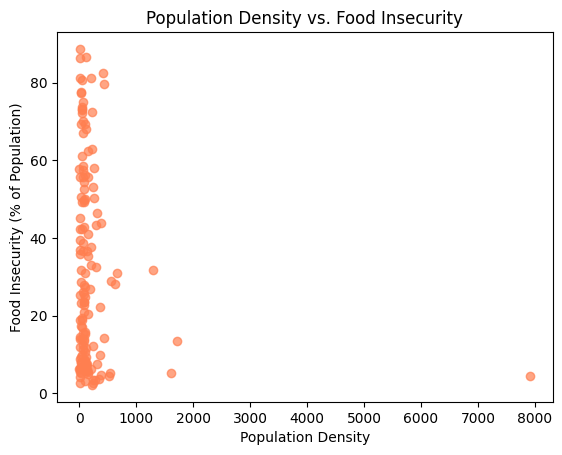

In [32]:
# visualize pop_density against food_insecurity using a scatter plot
plt.scatter(
    waste_analysis['pop_density'],
    waste_analysis['food_insecurity'],
    c='coral',
    alpha=0.7
)
plt.xlabel('Population Density')
plt.ylabel('Food Insecurity (% of Population)')
plt.title('Population Density vs. Food Insecurity')
plt.show()

In the above visualization, it's difficult to make out any clear trends in the population density vs. food insecurity relationship because the points appear to be spread fairly consistently.<br>
Again, we can try to zoom in further to see if any patterns become more evident.

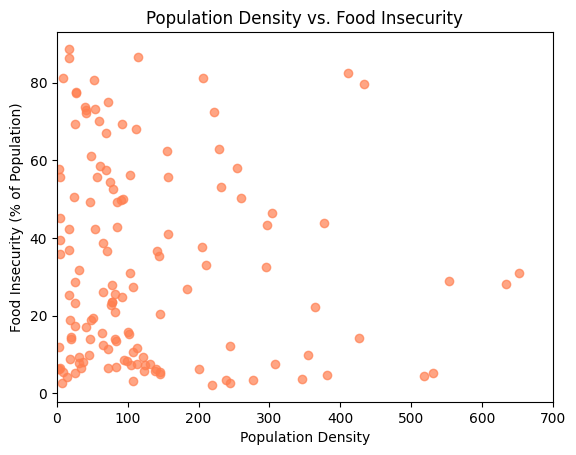

In [33]:
# visualize pop_density against food_insecurity using a scatter plot
plt.scatter(
    waste_analysis['pop_density'],
    waste_analysis['food_insecurity'],
    c='coral',
    alpha=0.7
)
plt.xlabel('Population Density')
plt.ylabel('Food Insecurity (% of Population)')
plt.title('Population Density vs. Food Insecurity')

# set x-axis threshold to exclude outliers and get a better picture of the majority of countries plotted
plt.xlim(left=0, right=700)
plt.show()


Even at this level, **there does not appear to be a definitive relationship between population density and food insecurity**.<br>
This is not surprising, given the exceedingly weak correlation coefficient between the two.

## ***summary of findings***

**Countries in Western Asia have the most food waste**, with Malaysia specifically being the most food-wasteful country in the world.<br>

**Western European nations create the least food waste** on average, which is still a significant amount at over 100kg per capita.

Interestingly enough, the only two European countries to be even near the top in terms of food waste were Greece and Malta (at 175 and 168 kg per capita), both Southern Europeann countries.<br>
Given their low *waste_to_wealth ratio*s, this suggests a potential cultural dynamic at play.

**Sub-Saharan African countries are the least food-secure**, with over 60% of the population experiencing moderate-to-severe food insecurity.<br>
**Western European nations are the most food-secure** on average, with less than 5% of the population experiencing moderate-to-severe food insecurity.

**Countries in Eastern Asia are the most population-dense**, with over 4,000 people per square kilometer on average.<br>
**Australia and New Zealand are the least densely populated countries** with fewer than 25 people per square kilometer on average.

**Western European countries are by far the wealthiest** at over 60,000 GDP per capita while **Sub-Saharan African countries are vastly poorer** with only around 2,000 GDP per capita.

Western Europe appears to be the wealthiest, most food-secure and least food-wasteful.

On average, as the wealth of a country increases, the level of food insecurity decreases.

On average, as the level of food insecurity increases, the amount of food wasted increases.

On average, as the wealth of a country increases, the amount of food wasted per capita tends to decrease.<br>
However, this relationship is not very strong and is likely indirect, being the result of increased food security.